In [24]:
import os
!pip install pandas_read_xml

#Just change the location to your directory
#the program looks for result.xml and makes a graph out of it

pathlist=[]
location = '../input/asfassf/test_folder'

for r, d, f in os.walk(location):
    for item in f:
        if 'result.xml' in item:
            pathlist.append(os.path.join(r, item))
            
            
print(pathlist)


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
['../input/asfassf/test_folder/AG123/search/disease/result.xml', '../input/asfassf/test_folder/AG123/search/country/result.xml', '../input/asfassf/test_folder/AG123/search/funders/result.xml']


In [37]:
#First do all the imports
import pandas_read_xml as pdx
import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
#Initiate a dataframe that reads the xml things within the tags snippetsTree and snippets

#replace ../input/sddsfsdff/result.xml

def makegraph(file_name):
    df = pdx.read_xml(file_name, ['snippetsTree', 'snippets'])

    #Initiate two lists in which we are going to append the values
    row=[]
    colum=[]

    #Run a for loop to get the words and their frequency from df["result"][i] which is a dict. automatically made from the dataframe
    for i in range(0,len(df['result'])):
        row.append(df['result'][i]['@word'])
        colum.append(df['result'][i]['@count'])

    #print(row)
    #print(colum)
    
    name_for_grap=os.path.dirname(file_name)
    name_for_graph=os.path.basename(name_for_grap)
    
    name=file_name.replace("/",'_')
    name_final=name.replace('.','_')
    #Make new dataframe with the names and frequency
    df = pd.DataFrame({"Name":row,
                      "Frequency":colum})
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    df['Name without stop'] = df['Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df['Name without stop'].replace('', np.nan, inplace=True)
    df.dropna(subset=['Name without stop'], inplace=True)
    #initiate matplotlib
    plt.figure(figsize=(10,6))
    #configure seaborn graph to make things look pretty and sort the data
    sns.barplot(x="Name",
                y="Frequency", 
                data=df, 
                order=df.sort_values('Frequency').Name)
    plt.xlabel(name_for_graph)
    #rotate the x axis labels because they dont fit in graph
    plt.xticks(rotation=90)
    # adding tight_layout to make sure everything is nice and organised and doesnt overflow
    plt.tight_layout()
    # save the graph
    
    
    name=file_name.replace("/",'_')
    name_final=name.replace('.','_')
    plt.savefig(f"abc{name_final}.png", dpi=100)
    return("Made the graphs")





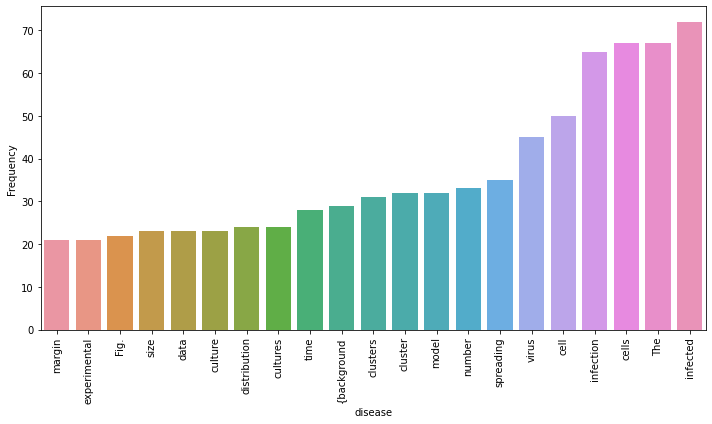

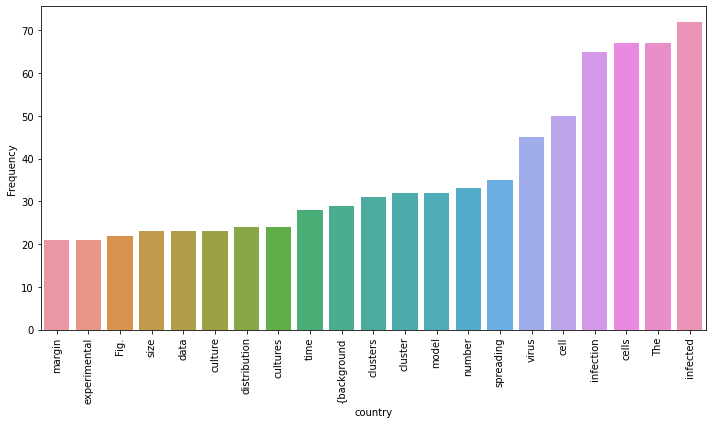

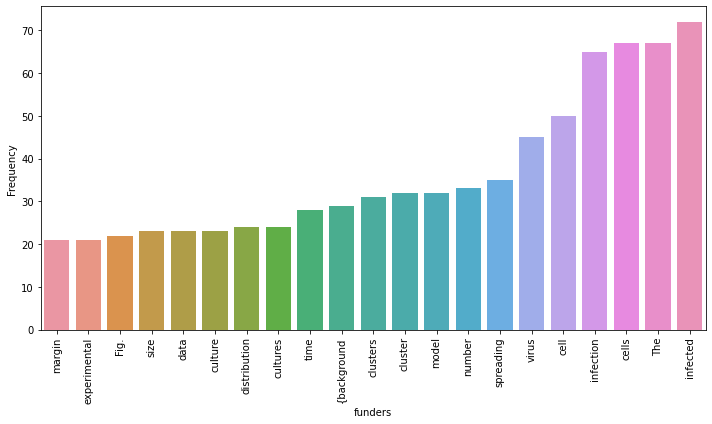

In [38]:
for i in pathlist:
    makegraph(i)